# Tâche 7

Déterminer la bande interdite,

Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches),

Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [2]:
import numpy as np
from mp_api.client import MPRester
from lmapr1492 import *
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from tabulate import tabulate

In [3]:
mp_key = "xaEW7gxeGjtHSTeJuWSz9Uf8JpzNlgtg"
mp_id = "mp-9382"

In [4]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
struct = SpacegroupAnalyzer(structure)
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 1) Structure de bande électronique du  SrZrN2

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

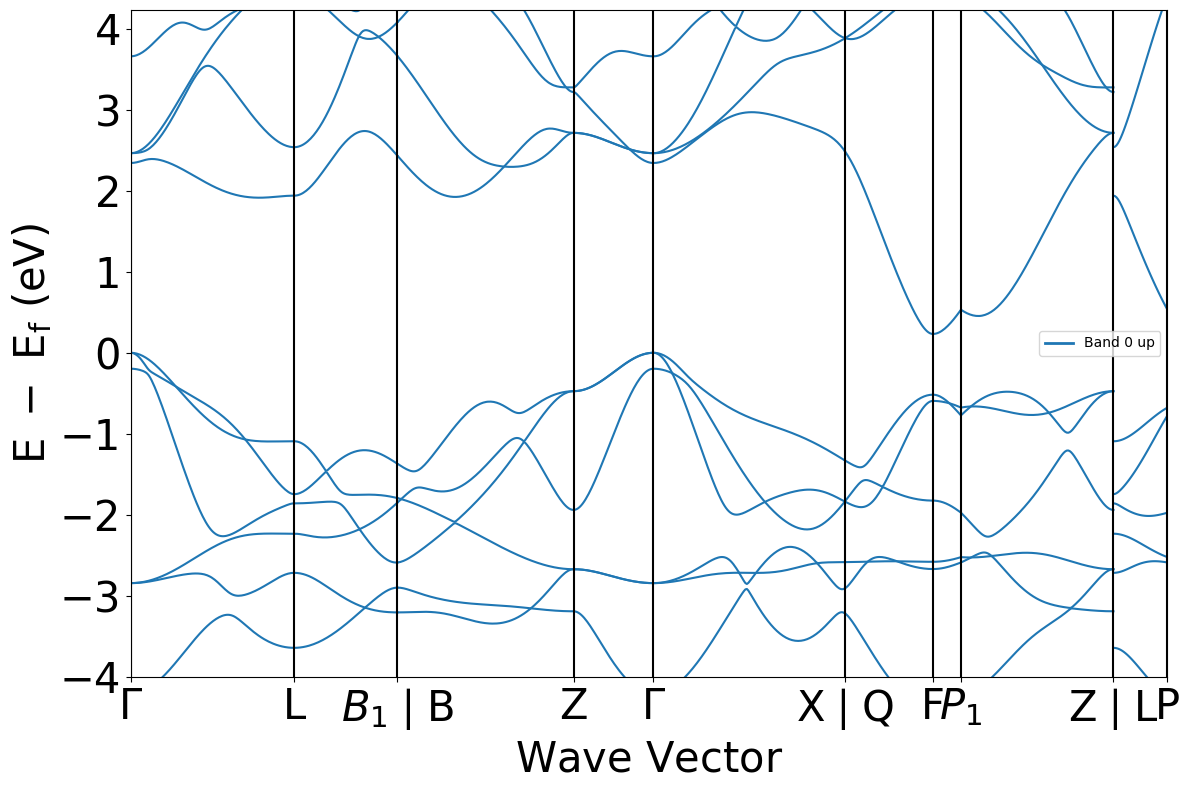

In [5]:
fig = BSPlotter(el_bs)
fig.get_plot()

# 2) Bande interdite

In [6]:
print(el_bs.get_band_gap())

{'direct': False, 'energy': 0.23249999999999993, 'transition': '\\Gamma-F'}


La bande interdite (ou gap de bande) correspond à l’intervalle énergétique séparant la bande de valence de la bande de conduction dans un matériau. Pour qu’un électron puisse passer de la bande de valence à la bande de conduction (et ainsi contribuer à la conduction électrique), il doit absorber une énergie au moins égale à celle de cette bande interdite.

Dans le cas étudié (SrZrN2), l’énergie de la bande interdite est Eg = 0.2325 eV. La transition électronique s’effectue entre le point Γ (sommet de la bande de valence) et le point F (base de la bande de conduction). Ce matériau est donc un semiconducteur, avec un gap inférieur à 1 eV.

La bande interdite est indirecte, le sommet de la bande de valence et la base de la bande de conduction ne se situent pas au même point dans l’espace réciproque. En d'autres termes, une bande interdite indirecte peut être décrite comme le phénomène dans lequel le maximum de la bande de valence ainsi que le minimum de la bande de conduction sont à différentes valeurs de k.

Dans les semi-conducteurs à bande interdite indirecte, la transition d'un électron de la bande de valence à la bande de conduction nécessite non seulement un apport d'énergie, mais aussi un changement de vecteur d'onde. Les photons, ayant un vecteur d'onde très faible, ne peuvent pas fournir ce changement. Par conséquent, un phonon doit intervenir pour compenser cette différence de vecteur d'onde

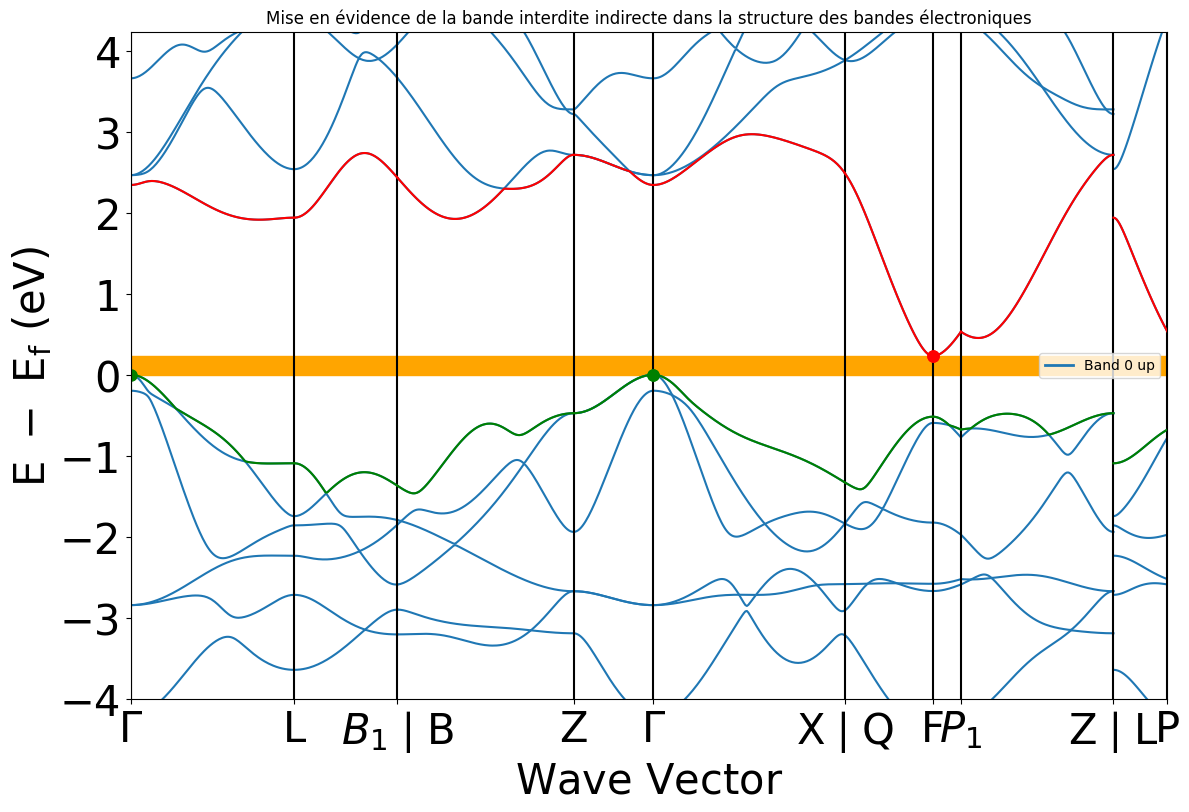


Dernière bande de valence :
Énergie du maximum de la bande de valence = 4.20 eV
Vecteur k en coordonnées cartésiennes = [0. 0. 0.]
Indices des bandes de valence : [14, 15]

Première bande de conduction :
Énergie minimum de la bande de conduction = 4.43 eV
Vecteur k en coordonnées cartésiennes = [ 0.52148528  0.         -0.99597691]
Indices des bandes de conduction : [16]


In [7]:
bsplot = BSPlotter(el_bs)
bsdata = bsplot.bs_plot_data()
distance = bsdata.get('ticks').get('distance')
distances = bsdata.get('distances')
energy = bsdata.get('energy')


vbm_band_index = el_bs.get_vbm()['band_index'][Spin.up][-1]  # Dernière bande de valence
cbm_band_index = el_bs.get_cbm()['band_index'][Spin.up][0]   # Première bande de conduction


BSPlotter(el_bs).get_plot()


for i in range(len(distances)):
    plt.plot(distances[i], energy.get('1')[i][vbm_band_index], 'green') 
    plt.plot(distances[i], energy.get('1')[i][cbm_band_index], 'red') 


cbm_coord = bsdata.get('cbm')
for (x, y) in cbm_coord:
    plt.plot(x, y, 'or', markersize=8)  


vbm_coord = bsdata.get('vbm')
for (x, y) in vbm_coord:
    plt.plot(x, y, 'og', markersize=8)  


plt.title("Mise en évidence de la bande interdite indirecte dans la structure des bandes électroniques")
plt.fill_between(
    np.linspace(distance[0], distance[-1], 500), 
    0, 
    el_bs.get_band_gap().get('energy'), 
    color="orange"
)

plt.show()

vbm = el_bs.get_vbm()
cbm = el_bs.get_cbm()


indices_vbm = list(vbm["band_index"].get(Spin.up, []))  
indices_cbm = list(cbm["band_index"].get(Spin.up, []))  


kpoint_vbm = vbm["kpoint"].cart_coords
kpoint_cbm = cbm["kpoint"].cart_coords


print("\nDernière bande de valence :")
print("Énergie du maximum de la bande de valence = {:.2f} eV".format(vbm["energy"]))
print("Vecteur k en coordonnées cartésiennes =", kpoint_vbm)
print("Indices des bandes de valence :", indices_vbm)

print("\nPremière bande de conduction :")
print("Énergie minimum de la bande de conduction = {:.2f} eV".format(cbm["energy"]))
print("Vecteur k en coordonnées cartésiennes =", kpoint_cbm)
print("Indices des bandes de conduction :", indices_cbm)


# 3) Dispersion

La dispersion dans les bandes de conduction et de valence décrit comment l’énergie des électrons varie en fonction de leur vecteur d’onde k. Cette relation, notée E(k), influence directement la mobilité des électrons et les propriétés de transport électrique d’un matériau. Un électron se déplace dans un matériau avec une vitesse de groupe proportionnelle à la pente de E(k). Plus cette pente est prononcée, plus l’électron est mobile. À l’inverse, une pente faible traduit une dispersion réduite et une mobilité plus limitée.

Dans un diagramme de bandes électroniques, une forte dispersion correspond à une bande inclinée, indiquant que les électrons peuvent se déplacer rapidement, une caractéristique favorable à la conductivité. En revanche, une bande plate reflète une faible dispersion, suggérant que les électrons sont plus localisés et moins aptes à se déplacer librement.

In [8]:
x = np.unique(bsdata["ticks"]["distance"])  
y = bsdata["energy"]

num_points = len(x) - 1 

dx = np.zeros(num_points)
dy_vbm = np.zeros(num_points)
dy_cbm = np.zeros(num_points)
m_vbm = np.zeros(num_points)
m_cbm = np.zeros(num_points)

for i in range(num_points):
    dx[i] = x[i+1] - x[i]

for i in range(num_points):
    dy_vbm[i] = y["1"][i][vbm_band_index][-1] - y["1"][i][vbm_band_index][0] 
    dy_cbm[i] = y["1"][i][cbm_band_index][-1] - y["1"][i][cbm_band_index][0] 


for i in range(num_points):
    m_vbm[i] = dy_vbm[i] / dx[i]
    m_cbm[i] = dy_cbm[i] / dx[i]

idx_max_vbm = np.argmax(abs(m_vbm))
idx_min_vbm = np.argmin(abs(m_vbm))
idx_max_cbm = np.argmax(abs(m_cbm))
idx_min_cbm = np.argmin(abs(m_cbm))

print("En valeur absolue :")
print("La plus grande dispersion pour la bande de valence : {:.6f} (index {})".format(abs(m_vbm[idx_max_vbm]), idx_max_vbm))
print("La plus grande dispersion pour la bande de conduction : {:.6f} (index {})".format(abs(m_cbm[idx_max_cbm]), idx_max_cbm))
print("La plus faible dispersion pour la bande de valence : {:.6f} (index {})".format(abs(m_vbm[idx_min_vbm]), idx_min_vbm))
print("La plus faible dispersion pour la bande de conduction : {:.6f} (index {})".format(abs(m_cbm[idx_min_cbm]), idx_min_cbm))



En valeur absolue :
La plus grande dispersion pour la bande de valence : 1.392232 (index 5)
La plus grande dispersion pour la bande de conduction : 3.942881 (index 8)
La plus faible dispersion pour la bande de valence : 0.200407 (index 7)
La plus faible dispersion pour la bande de conduction : 0.115531 (index 4)


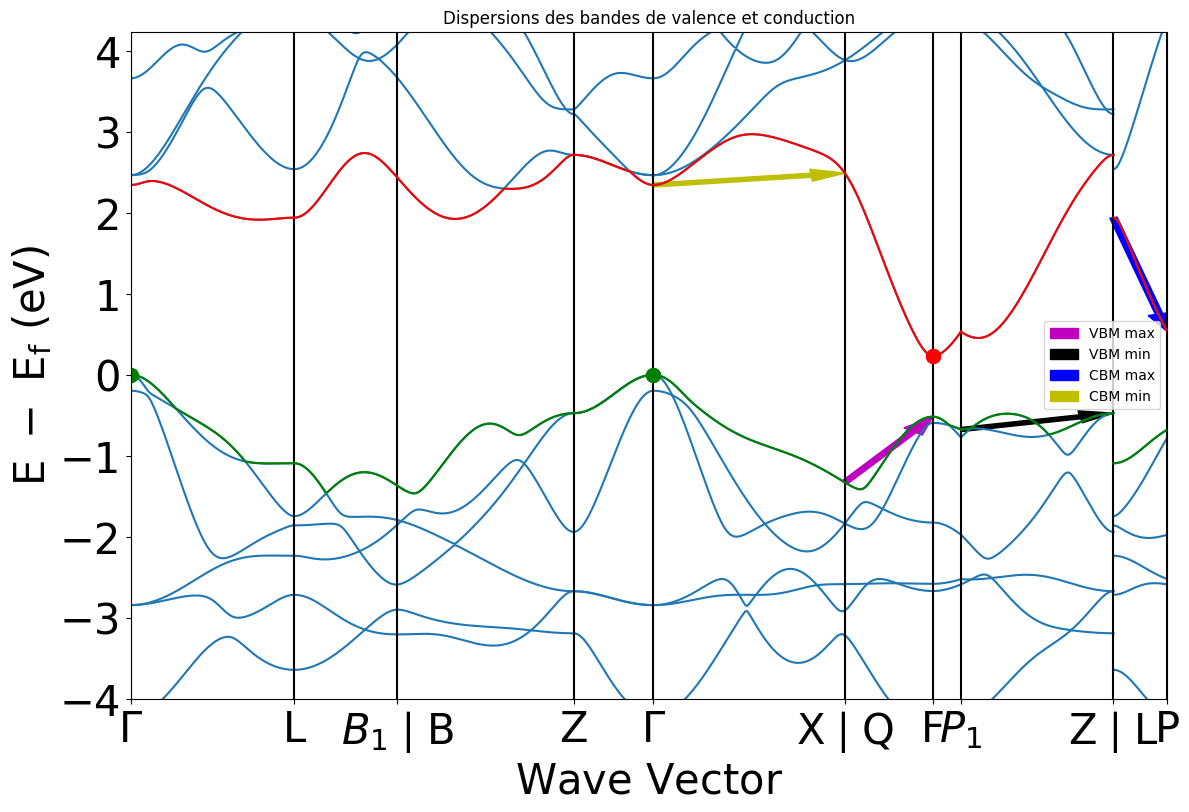

In [9]:
bsplot.get_plot()


plt.arrow(x[idx_max_vbm], y["1"][idx_max_vbm][vbm_band_index][0], dx[idx_max_vbm], dy_vbm[idx_max_vbm], 
          color='m', width=0.05, head_width=0.15, length_includes_head=True, label="VBM max")

plt.arrow(x[idx_min_vbm], y["1"][idx_min_vbm][vbm_band_index][0], dx[idx_min_vbm], dy_vbm[idx_min_vbm], 
          color='k', width=0.05, head_width=0.15, length_includes_head=True, label="VBM min") 

plt.arrow(x[idx_max_cbm], y["1"][idx_max_cbm][cbm_band_index][0], dx[idx_max_cbm], dy_cbm[idx_max_cbm], 
          color='b', width=0.05, head_width=0.15, length_includes_head=True, label="CBM max")

plt.arrow(x[idx_min_cbm], y["1"][idx_min_cbm][cbm_band_index][0], dx[idx_min_cbm], dy_cbm[idx_min_cbm], 
          color='y', width=0.05, head_width=0.15, length_includes_head=True, label="CBM min")

d = len(distances)

for i in range(d):
    plt.plot(distances[i], energy['1'][i][vbm_band_index], 'green') 
    plt.plot(distances[i], energy['1'][i][cbm_band_index], 'red')   


for (x, y) in bsdata.get("vbm"):
    plt.plot(x, y, 'og', markersize=10)  

for (x, y) in bsdata.get("cbm"):
    plt.plot(x, y, 'or', markersize=10) 

plt.title("Dispersions des bandes de valence et conduction")
plt.legend()
plt.show()

La dernière bande de valence présente donc le plus de dispersion dans la direction$X|Q–F$ et le moins de dispersion dans la direction $P₁-Z|L$.

La première bande de conduction présente donc le plus de dispersion dans la direction $Γ–X|Q$ et le moins de dispersion dans la direction $Z|L–P$.


# 4) Masse effective

Il est souvent intéressant de décrire les électrons commes des particules libres dont la masse effective varie plutôt que des particules de masse fixée évoluant dans un potentiel. Cette masse effective peut être positive ou négative, supérieur ou inférieure à la masse réelle de l'électron.

La masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l'énergie E par rapport au vecteur d'onde k : 

$ m^*_{ij} = \left( \frac{\partial^2 E}{\partial k_i \partial k_j} \right)^{-1}$

Nous nous intéressons ici à la masse effective au sommet de la dernière bande de valence et au bas de la première bande de conduction. Afin de simplifier le calcul, nous supposons une dispersion parabolique, ce qui permet de modéliser la relation entre l’énergie et le vecteur d’onde sous la forme d’une parabole. L'équation de la parabole est donnée par : 

\begin{equation*}
y = a k^2 + b k + c
\end{equation*}




In [10]:
hbar2 = ((6.62607004e-34) / (2 * np.pi))**2  # ℏ²
electronvolt = 1.602176634e-19               # 1 eV en joules
angstrom = 1e-10                             # 1 Å en mètres


Résultats de l'ajustement quadratique autour du VBM :
-------------------------------------------------------
Parabole d'approximation : y(k) = -5.867e+00·k² + 4.058e+01·k + -7.016e+01
Dérivée seconde           : -1.173e+01 eV·Å²
Masse effective           : -5.916e-31 kg
-------------------------------------------------------



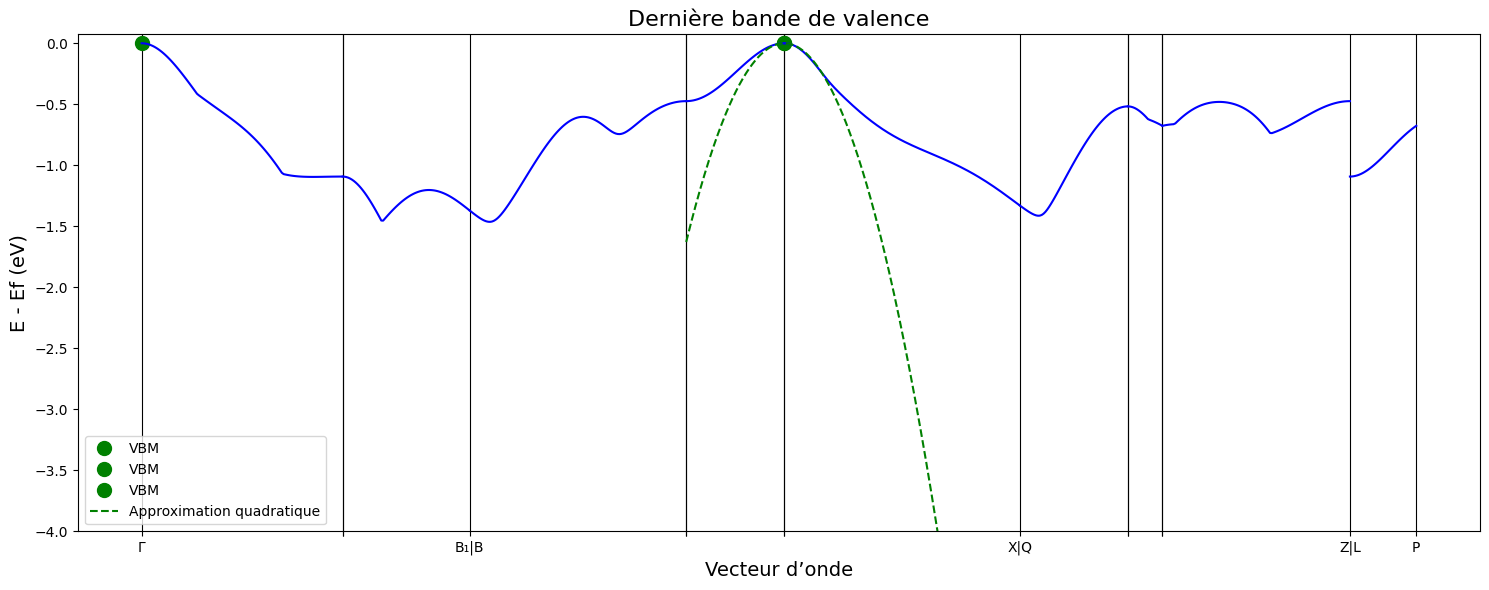

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

for d in distance:
    ax.axvline(d, color="black", linewidth=0.8)

for x, y in vbm_coord:
    ax.plot(x, y, 'og', markersize=10, label='VBM')

for i in range(len(distances)):
    ax.plot(distances[i], energy.get('1')[i][vbm_band_index], 'b')

ax.set_xticks(distance)
ax.set_xticklabels(['\u0393', 'L', '', 'B\u2081|B', 'Z', '', '\u0393', '', 'X|Q', 'F', '', 'P\u2081', '', 'Z|L', 'P'])
ax.set_xlabel('Vecteur d’onde', fontsize=14)
ax.set_ylabel('E - Ef (eV)', fontsize=14)
ax.set_title('Dernière bande de valence', fontsize=16)
ax.set_ylim(-4, None)

k_points = np.zeros(3)
energies = np.zeros(3)
k_points[1], energies[1] = vbm_coord[1]
k_points[0], energies[0] = distances[3][-2], energy.get('1')[3][vbm_band_index][-2]
k_points[2], energies[2] = distances[4][2], energy.get('1')[4][vbm_band_index][2]

coeffs = np.polyfit(k_points, energies, 2)

print("\nRésultats de l'ajustement quadratique autour du VBM :")
print("-------------------------------------------------------")
print(f"Parabole d'approximation : y(k) = {coeffs[0]:.3e}·k² + {coeffs[1]:.3e}·k + {coeffs[2]:.3e}")
print(f"Dérivée seconde           : {2 * coeffs[0]:.3e} eV·Å²")
print(f"Masse effective           : {hbar2 / (2 * coeffs[0] * electronvolt * angstrom**2):.3e} kg")
print("-------------------------------------------------------\n")

x_fit = np.linspace(distances[3][0], distances[4][-1], 1000)
ax.plot(x_fit, np.polyval(coeffs, x_fit), 'g--', label='Approximation quadratique')

ax.legend()
plt.tight_layout()
plt.show()


Pour estimer la masse effective des trous dans la bande de valence, nous avons ajusté une parabole d’approximation autour du maximum de la bande de valence (VBM). Cette méthode repose sur le fait qu’à proximité d’un extremum, la relation entre l’énergie  E  et le vecteur d’onde k peut être approximée par une fonction quadratique :

$E(k) \approx a k^2 + b k + c$

L’ajustement numérique donne la parabole suivante :

$y(k) = -5{,}867 \times 10^0 \cdot k^2 + 4{,}058 \times 10^1 \cdot k - 7{,}016 \times 10^1$

À partir de la dérivée seconde de cette parabole, nous obtenons une valeur de :

$\frac{d^2E}{dk^2} = -1{,}173 \times 10^1 \ \text{eV·A²}$

En utilisant la relation :
$m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}$

nous calculons une masse effective des trous de :
$m^* = -5{,}916 \times 10^{-31} \ \text{kg}$


Résultats de l'ajustement quadratique autour du CBM :
-------------------------------------------------------
Parabole d'approximation : y(k) = 2.174e+01·k² + -2.309e+02·k + 6.131e+02
Dérivée seconde           : 4.349e+01 eV·Å²
Masse effective           : 1.596e-31 kg
-------------------------------------------------------



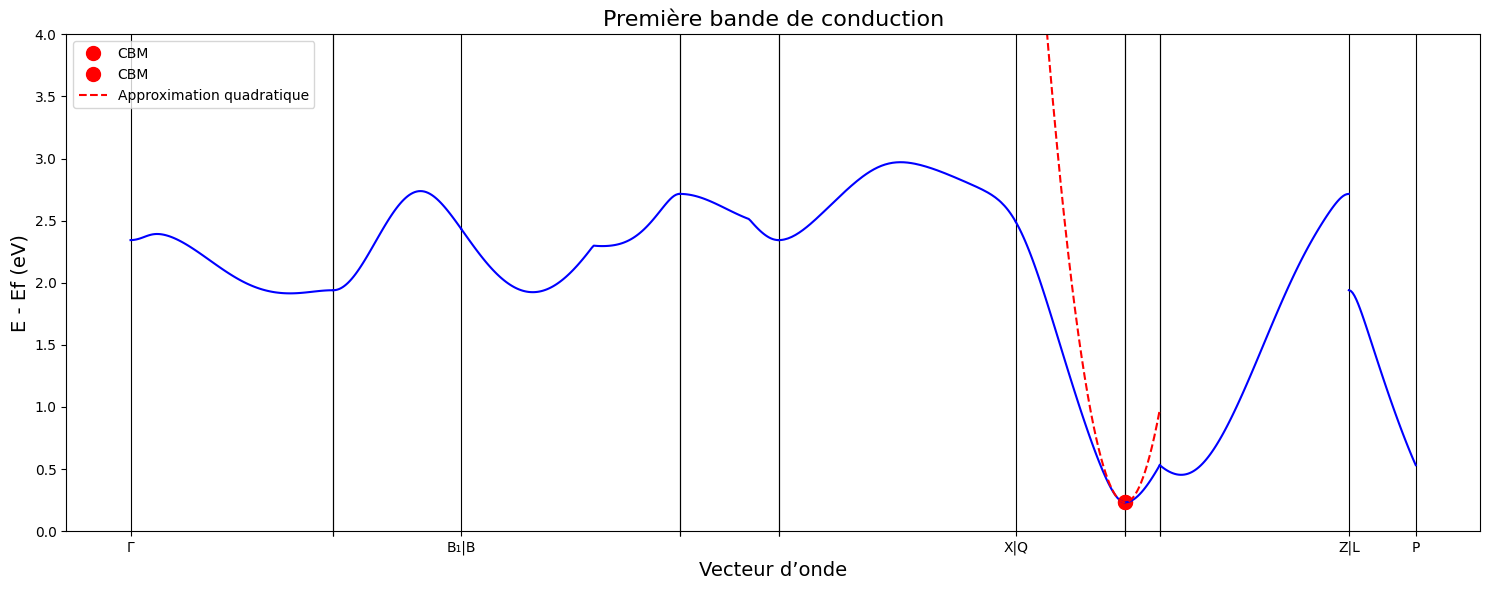

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))

for d in distance:
    ax.axvline(d, color="black", linewidth=0.8)

for x, y in cbm_coord:
    ax.plot(x, y, 'or', markersize=10, label='CBM')

for i in range(len(distances)):
    ax.plot(distances[i], energy.get('1')[i][cbm_band_index], 'b')

ax.set_xticks(distance)
ax.set_xticklabels(['\u0393', 'L', '', 'B\u2081|B', 'Z', '', '\u0393', '', 'X|Q', 'F', '', 'P\u2081', '', 'Z|L', 'P'])
ax.set_xlabel('Vecteur d’onde', fontsize=14)
ax.set_ylabel('E - Ef (eV)', fontsize=14)
ax.set_title('Première bande de conduction', fontsize=16)
ax.set_ylim(0, 4)

k_points_cbm = np.zeros(3)
energies_cbm = np.zeros(3)
k_points_cbm[1], energies_cbm[1] = cbm_coord[1]
k_points_cbm[0], energies_cbm[0] = distances[5][-2], energy.get('1')[5][cbm_band_index][-2]
k_points_cbm[2], energies_cbm[2] = (distances[6][1] + distances[6][2]) / 2, energy.get('1')[6][cbm_band_index][2]

coeffs_cbm = np.polyfit(k_points_cbm, energies_cbm, 2)

print("\nRésultats de l'ajustement quadratique autour du CBM :")
print("-------------------------------------------------------")
print(f"Parabole d'approximation : y(k) = {coeffs_cbm[0]:.3e}·k² + {coeffs_cbm[1]:.3e}·k + {coeffs_cbm[2]:.3e}")
print(f"Dérivée seconde           : {2 * coeffs_cbm[0]:.3e} eV·Å²")
print(f"Masse effective           : {hbar2 / (2 * coeffs_cbm[0] * electronvolt * angstrom**2):.3e} kg")
print("-------------------------------------------------------\n")

x_fit_cbm = np.linspace(distances[5][0], distances[6][-1], 1000)
ax.plot(x_fit_cbm, np.polyval(coeffs_cbm, x_fit_cbm), 'r--', label='Approximation quadratique')

ax.legend()
plt.tight_layout()
plt.show()


Pour estimer la masse effective des électrons dans la première bande de conduction, nous avons appliqué une approximation quadratique autour du minimum de la bande . En effet, à proximité d’un minimum d’énergie, la dispersion électronique peut être approchée par une parabole :

$E(k) \approx a k^2 + b k + c$

L’ajustement réalisé à partir de trois points proches du CBM donne l’équation suivante :

$y(k) = 2{,}174 \times 10^1 \cdot k^2 - 2{,}309 \times 10^2 \cdot k + 6{,}131 \times 10^2 $

La dérivée seconde de cette parabole est :
$\frac{d^2E}{dk^2} = 4{,}349 \times 10^1 \ \text{eV·A²}$

Ce qui permet de calculer la masse effective des électrons à partir de la formule :

$m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}$

On obtient ainsi :

$m^* = 1{,}596 \times 10^{-31} \ \text{kg}$
